# PCA example - Flags
Data Analysis - ISAE 2018/2019 - Ahmad Berjaoui

In [15]:
from os import path #path handling
import numpy as np #numpy arrays operation
from mpl_toolkits.mplot3d import Axes3D # 3D plots
import matplotlib.pyplot as plt #plotting and image viewing
from sklearn.decomposition import PCA
#inline plots for nicer viewing
%matplotlib inline 

In [16]:
def displayImage(data):
  """
  Display an image from RGB
  
  Args:
    data: (numpy.ndarray) RGB matrix
  """
  plt.imshow(data)
  plt.show()
  return

In [17]:
def correctImageHisto(img):
  """
  Shift image histogram by removing negative values in RGB matrix and normalizing values to [0,1]
  
  Args:
    img: (numpy.ndarray) RGB matrix to shift
  
  Returns: (numpy.ndarray) Corrected RGB matrix
  """
  shifted = img + np.abs(np.min(img))
  corrected = shifted/np.max(shifted)
  return corrected

In [18]:
def rgbScatterPlot(rgb,name):
  """
  Plot a 3D plot of RGB values
  
  Args:
    rgb: (numpy.ndarray) RGB line matrix
    name: (str) Plot name
  """
  fig = plt.figure(figsize=(12, 8), dpi=80, facecolor='w', edgecolor='k')
  
  ax = fig.add_subplot(111, projection='3d')
  ax.scatter(rgb[:,0],rgb[:,1],rgb[:,2])
  ax.set_xlabel('Red')
  ax.set_ylabel('Green')
  ax.set_zlabel('Blue')
  plt.title('{} RGB values'.format(name))
  plt.show()
  return

In [19]:
def getRGBMatrix(x):
  """
  Build a line-wise RGB matrix from an image, in preparation for PCA
  
  Args:
    x: (numpy.ndarray) Input image of shape (M,N,3)
  
  Returns: (numpy,ndarray) RGB line matrix of shape (M*N,3)
  """
  y = np.reshape(x,(-1,3))
  rgb = np.array([y[:,0],y[:,1],y[:,2]]).transpose()
  return rgb

## 1- Data loading

In [20]:
#dataPath = '/home/aberjaoui//Desktop/ISAE/solutions/data/flags' # path to folder containing the data
#flagUK = plt.imread(path.join(dataPath,'UK.jpg'))/255.0 # divide by 255 to get values between 0 and 1
#flagFR1 = plt.imread(path.join(dataPath,'France1.png')) # values already between 0 and 1 for png
#flagFR2 = plt.imread(path.join(dataPath,'France2.jpg'))/255.0 # divide by 255 to get values between 0 and 1
#murene = plt.imread(path.join(dataPath,'murene.jpg'))/255.0
flagUK = plt.imread('UK.jpg')
flagFR1 = plt.imread('France1.png')
flagFR2 = plt.imread('France2.jpg')

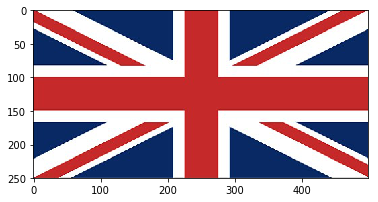

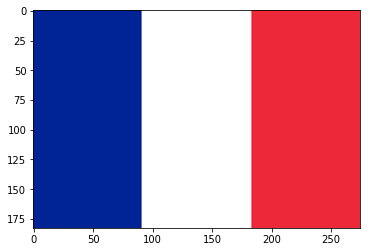

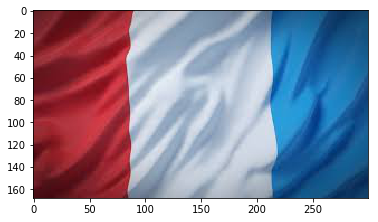

In [21]:
for flag in [flagUK,flagFR1,flagFR2]:
  displayImage(flag)

## 2- PCA

In [22]:
# Select a flag to generate a basis
# and save its shape

baseData = flagFR1
baseShape = baseData.shape

In [23]:
# Select another flag (can be the basis flag) to be decomposed in the previous basis
# and save its shape

otherData = flagFR2
otherShape = otherData.shape

In [24]:
# Create a PCA object

pca = PCA(n_components=2,
          copy=True,
          whiten=False,
          svd_solver='full',
          tol=0.0,
          iterated_power='auto',
          random_state=None)

(50325, 3)


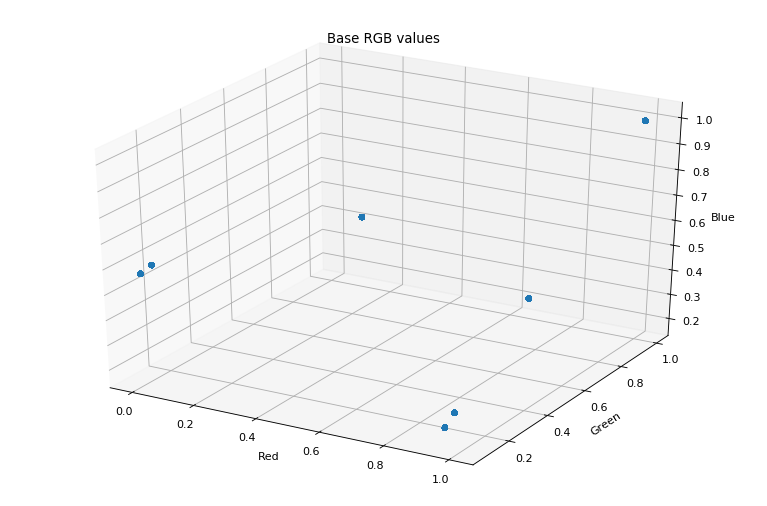

In [25]:
# reshape the data as a R,G,B matrix (each component is a line)

baseRGB = getRGBMatrix(baseData)
print(baseRGB.shape)
rgbScatterPlot(baseRGB,'Base')

In [26]:
# Apply decomposition

decomposition = pca.fit(baseRGB)
eigenVectors = decomposition.components_
eigenValues = decomposition.singular_values_
print('Variances explanation ratios: {}\n'.format(decomposition.explained_variance_))
print('decomposition: {}\n'.format(decomposition))
print('Eigen Vectors:\n {}\n'.format(eigenVectors))
print('Eigen Values:\n {}\n'.format(eigenValues))

Variances explanation ratios: [0.32289878 0.14392832]

decomposition: PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)

Eigen Vectors:
 [[ 0.64489836  0.6666961   0.37366048]
 [ 0.7089728  -0.33927807 -0.6182619 ]]

Eigen Values:
 [127.473755  85.1061  ]



## 3- Dimension reduction

In [27]:
# Decompose the other flag in the eigen vectors frame

otherRGB = getRGBMatrix(otherData) # get RGB data for other flag

reducedOtherCoeffs = decomposition.transform(otherRGB) # get base components for each eigen vector
reducedOtherVectors = np.dot(reducedOtherCoeffs,eigenVectors) # scalar product to return to colors

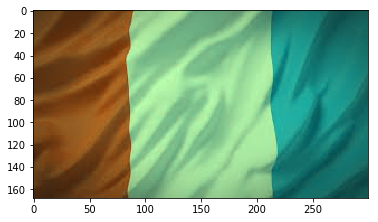

In [28]:
# Reshape reduced data into an image, correct histogram and display it
reducedOtherImage = correctImageHisto(np.reshape(reducedOtherVectors,otherShape))
displayImage(reducedOtherImage)

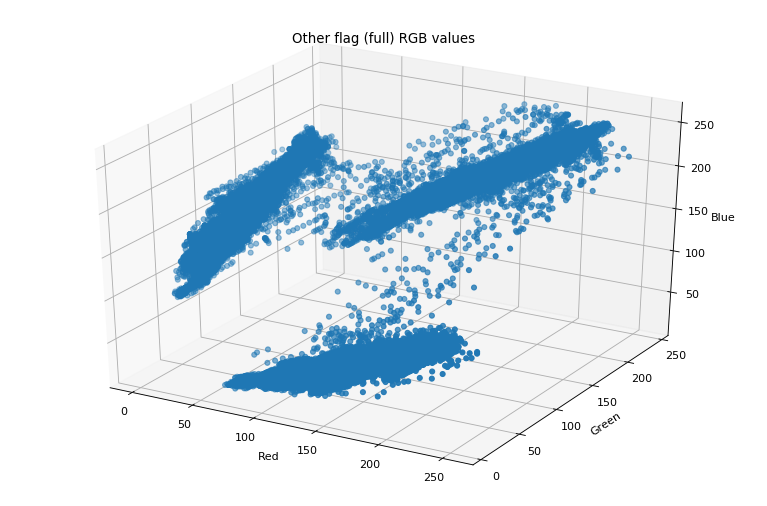

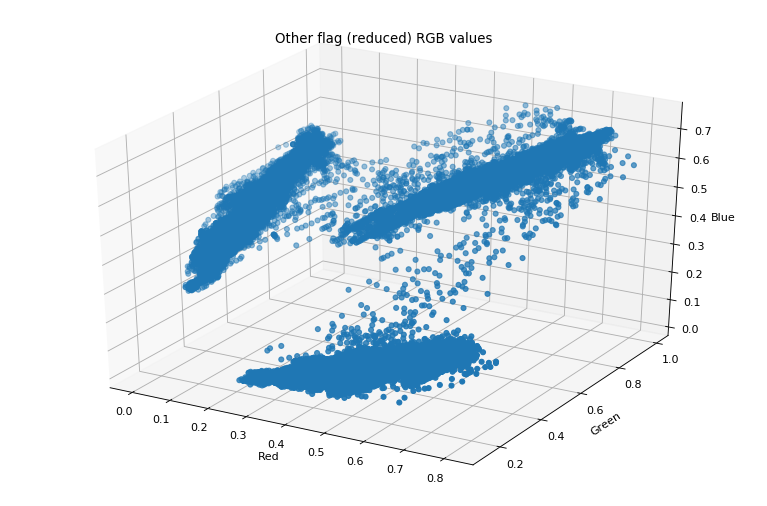

In [29]:
rgbScatterPlot(otherRGB,'Other flag (full)')
rgbScatterPlot(correctImageHisto(reducedOtherVectors),'Other flag (reduced)')